In [145]:
import pandas as pd
import numpy as np
import re
from pathlib import Path
from keras.models import load_model
from keras.preprocessing.image import load_img, img_to_array

import tensorflow as tf
from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator

# Display
from IPython.display import Image
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns

In [132]:
def change_labels(label):
    if label == 0:
        new_label = 'bee'
    elif label == 1:
        new_label = 'insect'
    elif label == 2:
        new_label = 'other'
    elif label == 3:
        new_label = 'wasp'
        
    return new_label           

In [133]:
def change_labels_tonum(label):
    if label == 'bee':
        new_label = 0
    elif label == 'insect':
        new_label = 1
    elif label == 'other':
        new_label = 2
    elif label == 'wasp':
        new_label = 3
        
    return new_label   

In [2]:
model_last1 = load_model('last_layer_trained_model.h5')
model_last2 = load_model('last_2_layers_trained_model.h5')
model_full = load_model('full_trained_model.h5')
model_removed = load_model('full_trained_model_removed_layers.h5')

In [169]:
train_dir = "kaggle_bee_vs_wasp/"
resize_size = 224
bees_vs_wasps_dataset_path=Path(train_dir)

In [170]:
training_subsample = 0.1
#insect_class = {'bee': 0,'wasp': 1, 'insect': 2,'other': 3} 

df_labels = pd.read_csv(bees_vs_wasps_dataset_path/'labels.csv')
df_labels = df_labels.set_index('id')
df_labels = df_labels.sample(frac=training_subsample, axis=0)
df_labels = df_labels[['path','label']]
df_labels = df_labels.reset_index(drop=True)
df_labels

,path,label
0,other_insect\14973099080_581b309d1c_w.jpg,insect
1,wasp2\G00141.jpg,wasp
2,wasp2\G00377.jpg,wasp
3,wasp2\H00227.jpg,wasp
4,other_insect\30215908638_7dd710d3bc_n.jpg,insect
...,...,...
1137,other_insect\40469249881_ebdb54ba83_n.jpg,insect
1138,other_insect\8179099529_edc49cf531_m.jpg,insect
1139,wasp2\F00181.jpg,wasp
1140,other_insect\19992196779_64461d19a8_w.jpg,insect


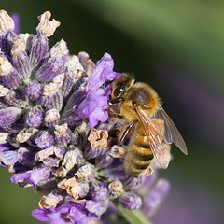

In [140]:
sample = df_labels.sample()
image_path = sample.path
image_path = image_path.replace('\\','/')
image = load_img(train_dir + image_path.values[0], target_size=(resize_size, resize_size))
image

In [118]:
image = img_to_array(image)
image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
predictions = model_full.predict(image)

print(predictions)
predicted_class = np.argmax(predictions)
print(predicted_class)
print(sample.label)

[[0.0000000e+00 1.0000000e+00 0.0000000e+00 3.2028324e-38]]
1
13    insect
Name: label, dtype: object


##  Last layer trained 

In [171]:
conf_matrix_last1 = np.zeros((4,4))
i=0
for index, row in df_labels.iterrows():
    real_class = change_labels_tonum(row.label)
    
    image_path = row.path
    image_path = image_path.replace('\\','/')
    image = load_img(train_dir + image_path, target_size=(resize_size, resize_size))
    image = img_to_array(image)
    image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
    predictions = model_last1.predict(image)
    predicted_class = np.argmax(predictions)
    
    conf_matrix_last1[real_class, predicted_class] += 1
    i += 1
    if i%100 == 0:
        print(i)

100
200
300
400
500
600
700
800
900
1000
1100


<AxesSubplot:>

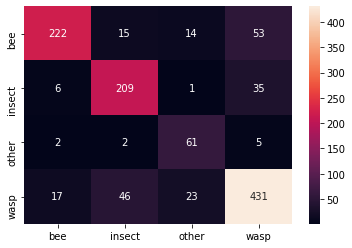

In [172]:
labels = ['bee','insect','other','wasp']
sns.heatmap(conf_matrix_last1, annot = True, fmt='g', xticklabels = labels, yticklabels=labels)

## Last 2 layers trained 

In [173]:
conf_matrix_last2 = np.zeros((4,4))
i=0
for index, row in df_labels.iterrows():
    real_class = change_labels_tonum(row.label)
    
    image_path = row.path
    image_path = image_path.replace('\\','/')
    image = load_img(train_dir + image_path, target_size=(resize_size, resize_size))
    image = img_to_array(image)
    image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
    predictions = model_last2.predict(image)
    predicted_class = np.argmax(predictions)
    
    conf_matrix_last2[real_class, predicted_class] += 1
    i += 1
    if i%100 == 0:
        print(i)

100
200
300
400
500
600
700
800
900
1000
1100


<AxesSubplot:>

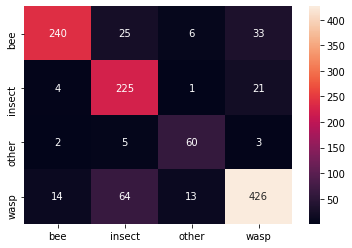

In [174]:
labels = ['bee','insect','other','wasp']
sns.heatmap(conf_matrix_last2, annot = True, fmt='g', xticklabels = labels, yticklabels=labels)

## Full trained model 

In [175]:
conf_matrix_full = np.zeros((4,4))
i=0
for index, row in df_labels.iterrows():
    real_class = change_labels_tonum(row.label)
    
    image_path = row.path
    image_path = image_path.replace('\\','/')
    image = load_img(train_dir + image_path, target_size=(resize_size, resize_size))
    image = img_to_array(image)
    image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
    predictions = model_full.predict(image)
    predicted_class = np.argmax(predictions)
    
    conf_matrix_full[real_class, predicted_class] += 1
    i += 1
    if i%100 == 0:
        print(i)

100
200
300
400
500
600
700
800
900
1000
1100


<AxesSubplot:>

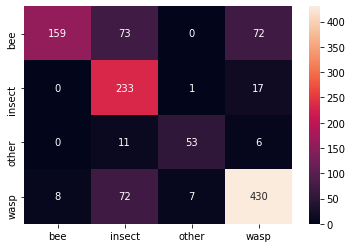

In [176]:
labels = ['bee','insect','other','wasp']
sns.heatmap(conf_matrix_full, annot = True, fmt='g', xticklabels = labels, yticklabels=labels)

## Full trained model removed layers 

In [177]:
conf_matrix_removed = np.zeros((4,4))
i=0
for index, row in df_labels.iterrows():
    real_class = change_labels_tonum(row.label)
    
    image_path = row.path
    image_path = image_path.replace('\\','/')
    image = load_img(train_dir + image_path, target_size=(resize_size, resize_size))
    image = img_to_array(image)
    image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
    predictions = model_removed.predict(image)
    predicted_class = np.argmax(predictions)
    
    conf_matrix_removed[real_class, predicted_class] += 1
    i += 1
    if i%100 == 0:
        print(i)

100
200
300
400
500
600
700
800
900
1000
1100


<AxesSubplot:>

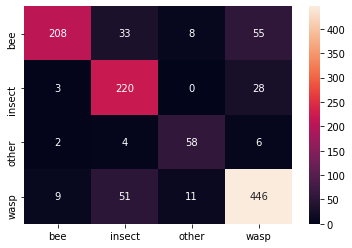

In [178]:
labels = ['bee','insect','other','wasp']
sns.heatmap(conf_matrix_removed, annot = True, fmt='g', xticklabels = labels, yticklabels=labels)